In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [16]:
# We read the parquet and turn it into a dataframe
df = pd.read_parquet('df.parquet.gzip')  

In [17]:
'''
K-Means
'''

'\nK-Means\n'

In [18]:
# We create a new dataframe
km = df
# km

In [19]:
# Query to receive the outlier
km.query('Time > 300')
# Here we are deleting the outlier
# km = km.drop(labels=[15, 121, 319, 188], axis=0)

,Game,Ratio,Players,AvgCompleted,Time,Rating,MaxGameScore,AvgGameScore
15,Halo: The Master Chief Collection,0.291109,455839.0,0.4,400.0,4.5,24046.0,7000.0
121,Deep Rock Galactic,0.195925,68659.0,0.1,400.0,4.1,5104.0,1000.0
319,Black Desert,0.269833,62581.0,0.9,625.0,3.4,3706.0,1000.0
388,Bejeweled 2,0.195122,23877.0,0.7,400.0,2.9,1025.0,200.0


In [20]:
# km.describe()

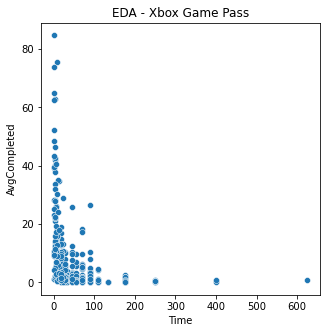

In [29]:
# Quick EDA
#EDA rápido de atributos a Analizar
plt.figure(figsize=(5,5))
sns.scatterplot(data=km, x='Time',y='AvgCompleted')
plt.title('EDA - Xbox Game Pass')
plt.xlabel('Time')
plt.ylabel('AvgCompleted')
plt.show()

In [22]:
km.columns

Index(['Game', 'Ratio', 'Players', 'AvgCompleted', 'Time', 'Rating',
       'MaxGameScore', 'AvgGameScore'],
      dtype='object')

In [23]:
km.iloc[:, [3,4]].values

array([[4.10e+00, 1.10e+02],
       [8.00e+00, 9.00e+01],
       [9.60e+00, 5.50e+01],
       [1.00e+00, 1.75e+02],
       [1.56e+01, 1.35e+01],
       [6.10e+00, 7.00e+01],
       [9.80e+00, 1.75e+01],
       [3.80e+00, 9.00e+01],
       [9.00e-01, 7.00e+01],
       [1.90e+00, 2.75e+01],
       [1.30e+00, 2.25e+01],
       [1.60e+00, 9.00e+01],
       [1.03e+01, 2.75e+01],
       [5.80e+00, 5.50e+01],
       [1.20e+00, 1.75e+02],
       [4.00e-01, 4.00e+02],
       [3.60e+00, 9.00e+01],
       [9.90e+00, 7.00e+01],
       [7.00e-01, 2.25e+01],
       [4.50e+00, 2.25e+01],
       [1.10e+00, 4.50e+01],
       [4.60e+00, 1.10e+02],
       [1.32e+01, 1.75e+01],
       [1.00e+00, 7.00e+01],
       [7.10e+00, 5.50e+01],
       [2.00e-01, 1.75e+02],
       [1.05e+01, 2.25e+01],
       [1.20e+00, 9.00e+01],
       [1.50e+01, 1.75e+01],
       [6.40e+00, 7.00e+01],
       [1.00e+00, 2.25e+01],
       [8.00e-01, 2.75e+01],
       [1.30e+00, 2.25e+01],
       [3.60e+00, 4.50e+01],
       [4.90e+

In [24]:
#Asignar atributos para Análisis (Annual_Income_(k$), Spending_Score)

X = km.iloc[:, [3,4]].values

# Usando Elbow para encontrar los clusters óptimos
# Se determina el Valor WCSS
# Within Cluster Sum of Squares - Sum of the squared deviations from each observation and the cluster centroid.

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 45)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Parámetro Inercia

D:\Programas\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


D:\Programas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


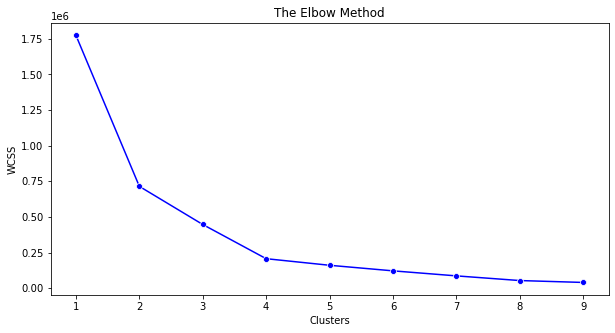

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 45)

kmeans

KMeans(n_clusters=4, random_state=45)

In [27]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 3, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0,

D:\Programas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programas\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Programas\Anaconda\lib\site-

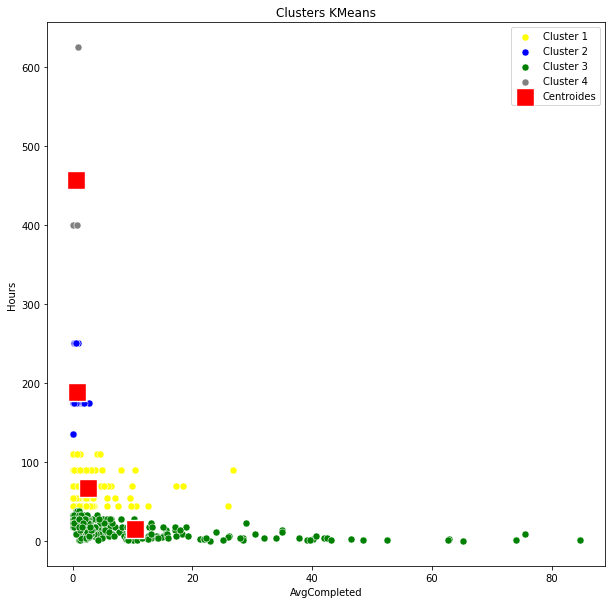

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroides',s=300,marker=',')
plt.title('Clusters KMeans')
plt.xlabel('AvgCompleted')
plt.ylabel('Hours')
plt.legend()
plt.show()